In [2]:
import pandas as pd
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

import matplotlib.pyplot as plt

import acquire
import prepare

## Acquire 

In [4]:
#get titanic data
df = acquire.get_titanic_data()
df.head()

csv file found and loaded


,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


## Prep

In [6]:
#prepare titanic data
df = prepare.prep_titanic(df)
df.head()

,passenger_id,survived,pclass,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,0,3,1,0,7.2500,0,1,0,1
1,1,1,1,1,0,71.2833,0,0,0,0
2,2,1,3,0,0,7.9250,1,0,0,1
3,3,1,1,1,0,53.1000,0,0,0,1
4,4,0,3,0,0,8.0500,1,1,0,1


In [7]:
#define target
target = 'survived'

In [9]:
#use my splitting prepare function 
train, validate, test = prepare.my_train_test_split(df, target)

In [10]:
print(df.shape)
print()
print(train.shape)
print(validate.shape)
print(test.shape)

(891, 10)

(534, 10)
(178, 10)
(179, 10)


In [11]:
#split into X and y 
X_train = train.drop(columns=[target])
y_train = train[target]

X_validate = validate.drop(columns=[target])
y_validate = validate[target]

X_test = test.drop(columns=[target])
y_test = test[target]

In [13]:
print(X_train.shape)
print(X_validate.shape)
print(X_test.shape)
print()
print(y_train.shape)
print(y_validate.shape)
print(y_test.shape)

(534, 9)
(178, 9)
(179, 9)

(534,)
(178,)
(179,)


### Fit a K-Nearest Neighbors classifier to your training sample and transform (i.e. make predictions on the training sample)

#### 1. make it

In [16]:
# how many neighbors?
knn = KNeighborsClassifier()
knn

KNeighborsClassifier()

#### 2. fit it

In [18]:
knn = knn.fit(X_train, y_train)
knn

KNeighborsClassifier()

#### 3. do it

In [20]:
y_pred = knn.predict(X_train)
y_pred

array([0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

### Evaluate your results using the model score, confusion matrix, and classification report.

#### model score

In [21]:
knn.score(X_train, y_train)

0.7397003745318352

#### confusion matrix

In [23]:
#calculate cm
cm = confusion_matrix(y_train, y_pred)
cm

array([[289,  40],
       [ 99, 106]])

In [24]:
knn.classes_

array([0, 1])

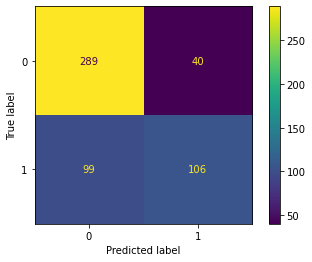

In [28]:
#display cm
disp = ConfusionMatrixDisplay(cm, display_labels=knn.classes_)

disp.plot()
plt.show()

#### classifcation report

In [30]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.88      0.81       329
           1       0.73      0.52      0.60       205

    accuracy                           0.74       534
   macro avg       0.74      0.70      0.71       534
weighted avg       0.74      0.74      0.73       534



In [33]:
report = classification_report(y_train, y_pred, output_dict=True)
pd.DataFrame(report)

,0,1,accuracy,macro avg,weighted avg
precision,0.744845,0.726027,0.7397,0.735436,0.737621
recall,0.878419,0.517073,0.7397,0.697746,0.739700
f1-score,0.806137,0.603989,0.7397,0.705063,0.728533
support,329.000000,205.000000,0.7397,534.000000,534.000000


### Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [35]:
confusion_matrix(y_train, y_pred).ravel()

array([289,  40,  99, 106])

In [36]:
tn, fp, fn, tp = confusion_matrix(y_train, y_pred).ravel()
all = tn + fp + fn + tp

In [37]:
tn, fp, fn, tp, all

(289, 40, 99, 106, 534)

In [38]:
accuracy = (tp + tn)/all
print(f"Accuracy: {accuracy}")

true_positive_rate = tp/(tp+fn)
print(f"True Positive Rate: {true_positive_rate}")

false_positive_rate = fp/(fp+tn)
print(f"False Positive Rate: {false_positive_rate}")

true_negative_rate = tn/(tn+fp)
print(f"True Negative Rate: {true_negative_rate}")

false_negative_rate = fn/(fn+tp)
print(f"False Negative Rate: {false_negative_rate}")

precision = tp/(tp+fp)
print(f"Precision: {precision}")

recall = tp/(tp+fn)
print(f"Recall: {recall}")

f1_score = 2*(precision*recall)/(precision+recall)
print(f"F1 Score: {f1_score}")

support_pos = tp + fn
print(f"Support (0): {support_pos}")

support_neg = fp + tn
print(f"Support (1): {support_neg}")

Accuracy: 0.7397003745318352
True Positive Rate: 0.5170731707317073
False Positive Rate: 0.12158054711246201
True Negative Rate: 0.878419452887538
False Negative Rate: 0.48292682926829267
Precision: 0.726027397260274
Recall: 0.5170731707317073
F1 Score: 0.603988603988604
Support (0): 205
Support (1): 329


### Run through steps 2-4 setting k to 10

### Run through steps 2-4 setting k to 20

In [53]:
models_acc = []

for x in range(1,21):

    #make it
    knn = KNeighborsClassifier(n_neighbors=x)

    #fit it
    knn = knn.fit(X_train, y_train)

    #predict it
    y_pred = knn.predict(X_train)
    
    #score it
    acc = knn.score(X_train, y_train)
    
    models_acc.append([x, acc])

In [54]:
pd.DataFrame(models_acc, columns =['neighbors','accuracy'])

,neighbors,accuracy
0,1,1.000000
1,2,0.786517
2,3,0.805243
3,4,0.741573
4,5,0.739700
5,6,0.707865
6,7,0.717228
7,8,0.717228
8,9,0.720974
9,10,0.709738


### What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

- Smaller numbers for k are able to capture details within the training set, but carry a risk for overfitting.

### Which model performs best on our out-of-sample data from validate?

In [64]:
models_acc = []

for x in range(1,31):

    #make it
    knn = KNeighborsClassifier(n_neighbors=x)

    #fit it
    knn = knn.fit(X_train, y_train)

#     predict it
#     y_pred = knn.predict(X_train)
#     y_pred_val = knn.predict(X_validate)
    
    #score it
    acc = knn.score(X_train, y_train)
    acc_val = knn.score(X_validate, y_validate)
    
    models_acc.append([x, acc, acc_val])

In [65]:
df_models = pd.DataFrame(models_acc, columns=['neighbors', 'train_accuracy',
                                  'validate_accuracy'])
df_models

,neighbors,train_accuracy,validate_accuracy
0,1,1.000000,0.567416
1,2,0.786517,0.612360
2,3,0.805243,0.606742
3,4,0.741573,0.601124
4,5,0.739700,0.578652
5,6,0.707865,0.606742
6,7,0.717228,0.601124
7,8,0.717228,0.601124
8,9,0.720974,0.595506
9,10,0.709738,0.589888


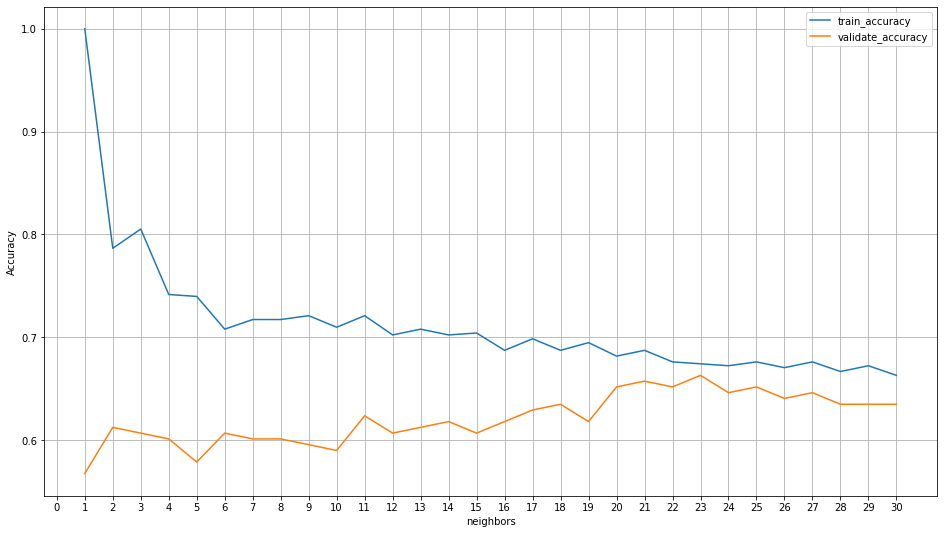

In [66]:
df_models.set_index('neighbors').plot(figsize = (16,9))
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,31,1))
plt.grid()